# Dataset Exploration
In this notebook, we explore the 75 time series segmentation datasets.

In [14]:
import numpy as np
import pandas as pd
import daproli as dp

import pandas as pd
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 26})

import seaborn as sns

sns.set_theme()
sns.set_color_codes()

import sys
sys.path.append("../../")

from tqdm import tqdm
from itertools import product

In [15]:
from tssb.utils import load_time_series_segmentation_datasets, visualize_time_series

Let's load and list the datasets.

In [16]:
df_ts = load_time_series_segmentation_datasets()
df_ts

,dataset,window_size,change_points,time_series
0,Adiac,10,"[572, 1012, 1232]","[1.681146, 1.383394, 1.029389, 0.688386, 0.354..."
1,ArrowHead,10,[753],"[-1.957721, -1.858082, -1.657983, -1.420794, -..."
2,Beef,50,[705],"[-0.380818, -0.352238, -0.295392, -0.225041, -..."
3,BeetleFly,10,[1280],"[1.114805, 0.774403, 0.477129, 0.115781, -0.24..."
4,BirdChicken,20,[1280],"[1.697714, 1.439032, 1.22287, 0.99708, 0.76479..."
5,Car,20,"[577, 1154, 1550]","[1.451648, 1.030174, 0.531853, 0.040229, -0.40..."
6,CBF,20,"[384, 704]","[-1.27713, -0.689811, -0.901181, -0.937038, -0..."
7,Chinatown,10,[],"[0.025935, -0.435655, -0.608168, -0.81565, -1...."
8,ChlorineConcentration,10,[2365],"[2.496227, 1.046743, 0.391124, 0.607525, -0.22..."
9,CinCECGTorso,10,"[2663, 5121]","[-0.118215, -0.115326, -0.111855, -0.1229, -0...."


Let's visualize by time series length, amount of change points and window size.

In [17]:
names = df_ts.dataset.to_numpy().tolist()

for idx, name in enumerate(names):
    if name == "PigInternalBleedingDatasetAirwayPressure":
        names[idx] = "PigAirwayPressure"
        
    if name == "PigInternalBleedingDatasetArtPressureFluidFilled":
        names[idx] = "PigFluidFilled"
        
    if name == "PigInternalBleedingDatasetCVP":
        names[idx] = "PigCVP"
        
    if name == "ChlorineConcentration":
        names[idx] = "Chlorine"
        
    if name == "DiatomSizeReduction":
        names[idx] = "DiatomSize"
        
    if name == "DistalPhalanxOutlineAgeGroup":
        names[idx] = "DistalPhalanx"
        
    if name == "InsectWingbeatSound":
        names[idx] = "InsectWingbeat"
        
    if name == "LargeKitchenAppliances":
        names[idx] = "LargeKitchen"
        
    if name == "NonInvasiveFetalECGThorax1":
        names[idx] = "ECGThorax1"
        
    if name == "NonInvasiveFetalECGThorax2":
        names[idx] = "ECGThorax2"
        
    if name == "ProximalPhalanxOutlineAgeGroup":
        names[idx] = "ProximalPhalanx"
        
names = np.array(names)

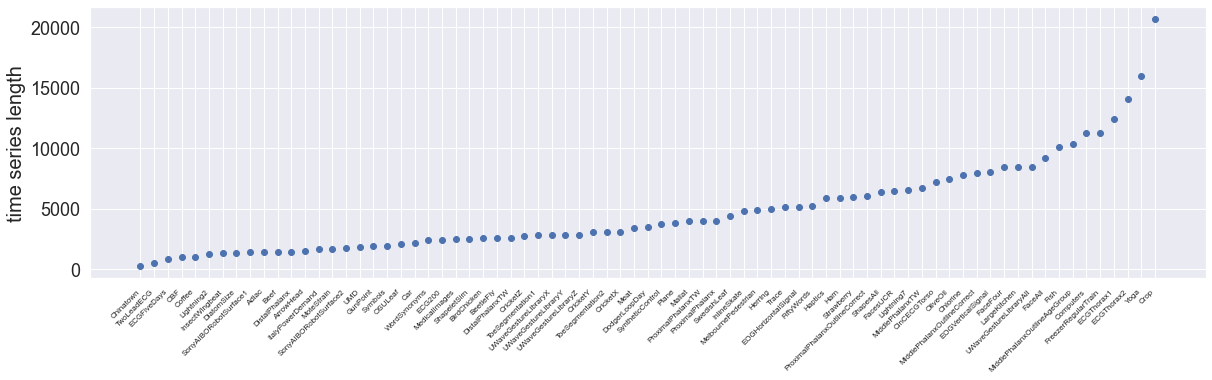

In [18]:
fontsize = 18

idx_sizes = np.argsort(df_ts.time_series.apply(len)).to_numpy()
_, ax = plt.subplots(1, figsize=(20,5))
ax.scatter(np.arange(df_ts.shape[0]), df_ts.time_series.apply(len).to_numpy()[idx_sizes])
ax.set_ylabel("time series length", fontsize=20)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)
    
plt.xticks(range(df_ts.shape[0]), names[idx_sizes], rotation = 45, ha="right", fontsize=8)

plt.show()

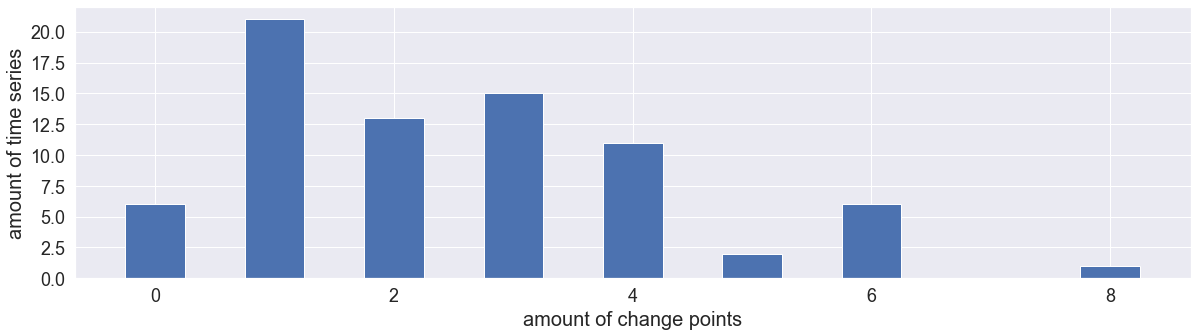

In [19]:
fontsize = 18

change_points, counts = np.unique(df_ts.change_points.apply(len), return_counts=True)
_, ax = plt.subplots(1, figsize=(20,5))
ax.bar(change_points, counts, width=.5)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

ax.set_xlabel("amount of change points", fontsize=20)
ax.set_ylabel("amount of time series", fontsize=20)

plt.show()

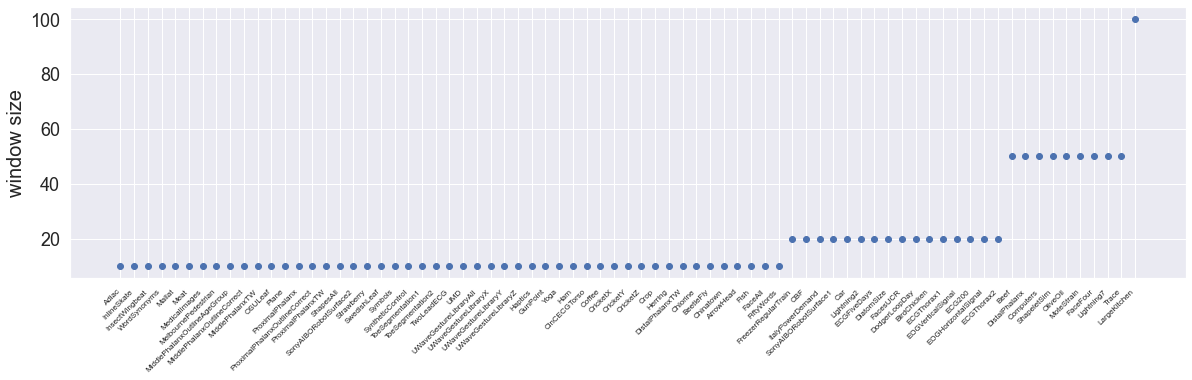

In [20]:
fontsize = 18

idx_sizes = np.argsort(df_ts.window_size.to_numpy())
_, ax = plt.subplots(1, figsize=(20,5))
ax.scatter(np.arange(df_ts.shape[0]), df_ts.window_size.to_numpy()[idx_sizes])
ax.set_ylabel("window size", fontsize=20)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)
    
plt.xticks(range(df_ts.shape[0]), names[idx_sizes], rotation = 45, ha="right", fontsize=8)

plt.show()

Now, let's visually inspect specific instances of time series.

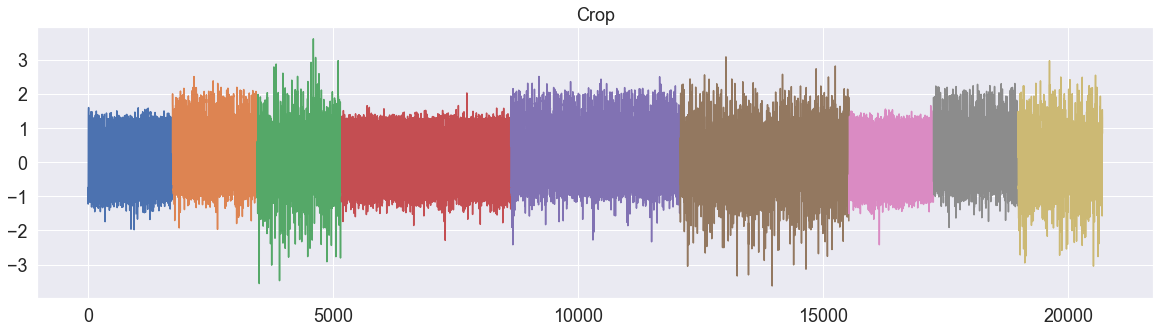

In [23]:
selection = 15
row = df_ts.iloc[selection,:]

fig, ax =  visualize_time_series(row.time_series, row.dataset, row.change_points)
plt.show()